## Objective

    1. Learn Random-Walk model
    2. Simulate Random-Walk model in R
    3. Obtain the correlogram of Random-Walk model
    4. Get stationary time-series using diff operator in R in the case of random-walk model
    

### Random-Walk model

    Random walk is a very simple model in which 'observation at time 't' (current position of a particle) is purely a function of observation at time 't-1' (previous position of a particle) plus a random noise'
    ie, X(t) = X(t-1) + Z(t)
    where Z(t) is a random normal noise of mean 'mu' and variance 'sigma^2'

    1. If we closely look 'random-walk' model simply accumulates noises over-time
        example : at X(0) = 0, X(1) = 0 + Z(1), X(2)=Z(1)+Z(2), X(3)=Z(1)+Z(2)+Z(3)....
        so X(t) = \Sum_{i=1 to t} Z(i)

### Random - Walk model is not a stationary time-series
    Because the expectation of X(t) and the variance of X(t) is time-dependent (changing over time)
    ie, E[X(t)] = E[\Sum_{i=1 to t} Z(i)] = \Sum_{i=1 to t} E[Z(i)]=\mu*t
    since Z(i) is a random white noise (the observations are un-correlated), the expectation of sums will be equal to sum of expectations
    Similarily, E[var(X(t)] = \sigma^2*t
    
    So it's clear that X(t) is ** not stationary ** from above equation. However let's try to simulate this process in R

### Random -Walk in 'R'

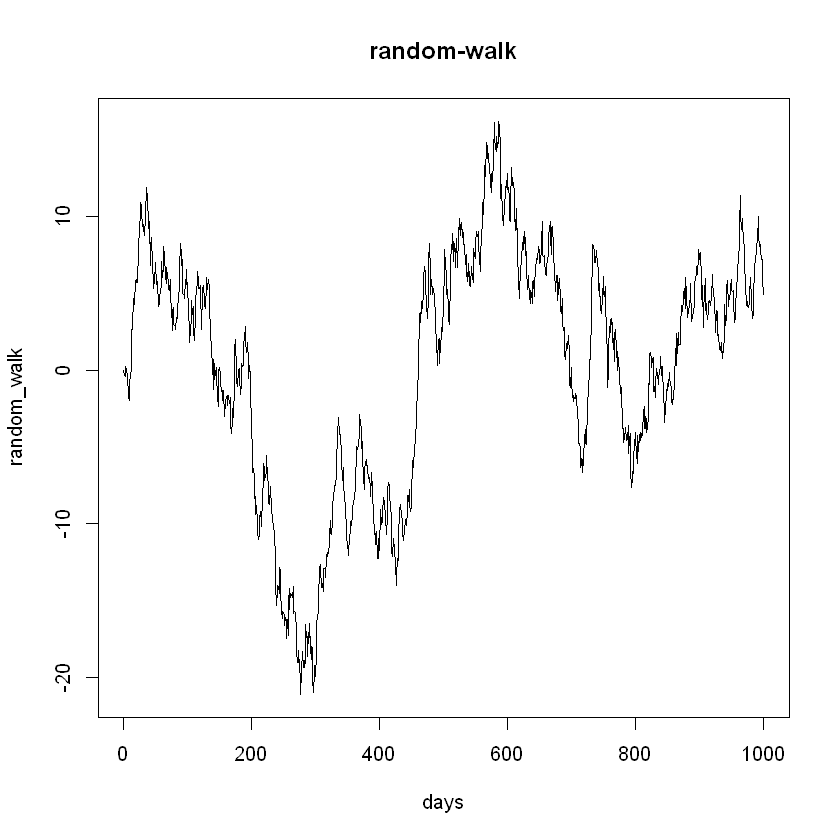

In [17]:
x <- c()
x[1] <- 0
for (i in 2:1000){
    x[i] <- x[i-1] + rnorm(1)
}
random_walk <- ts(x)
plot(random_walk,xlab='days',main='random-walk',lwd=1)

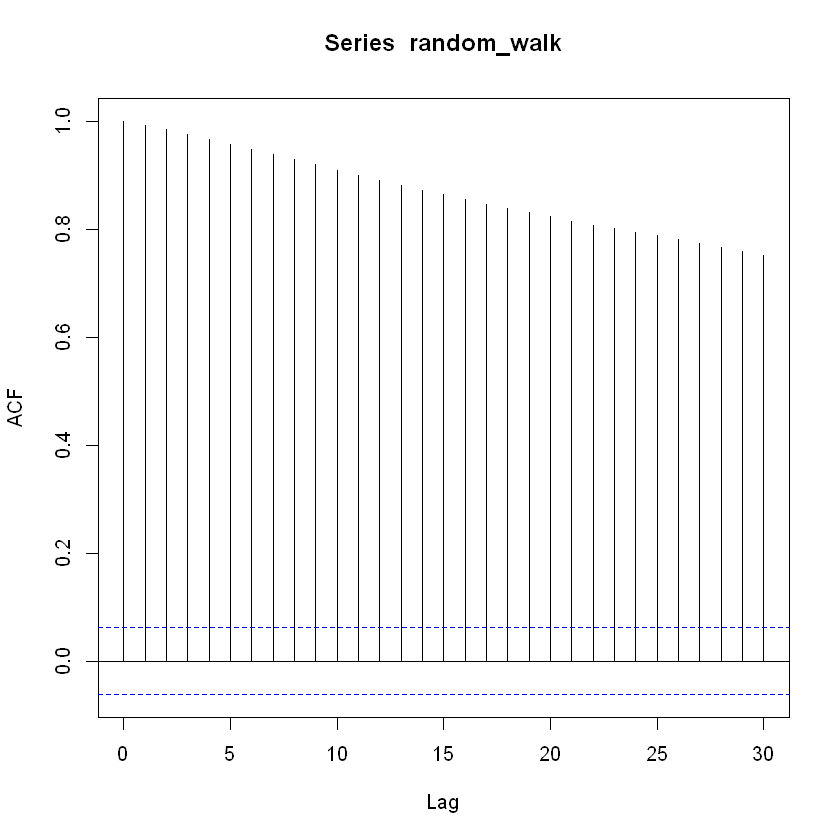

In [18]:
#let's look at the ACF plot.. Remember that X is not stationary because it's simply an accumulation of previous observations 
acf(random_walk,type = 'correlation') #we expect to see an auto-correlation even for every high lags


    As we know, the above model is of the form X(t) = X(t-1) + Z(t) where Z(t) -> N(0,1)
    We know that Z(t) is stationary (because it's a pure white noise). Let's use the ** diff ** function in R to difference the dependencies.
    ie, diff(X) = X(t) - X(t-1) = Z(t)

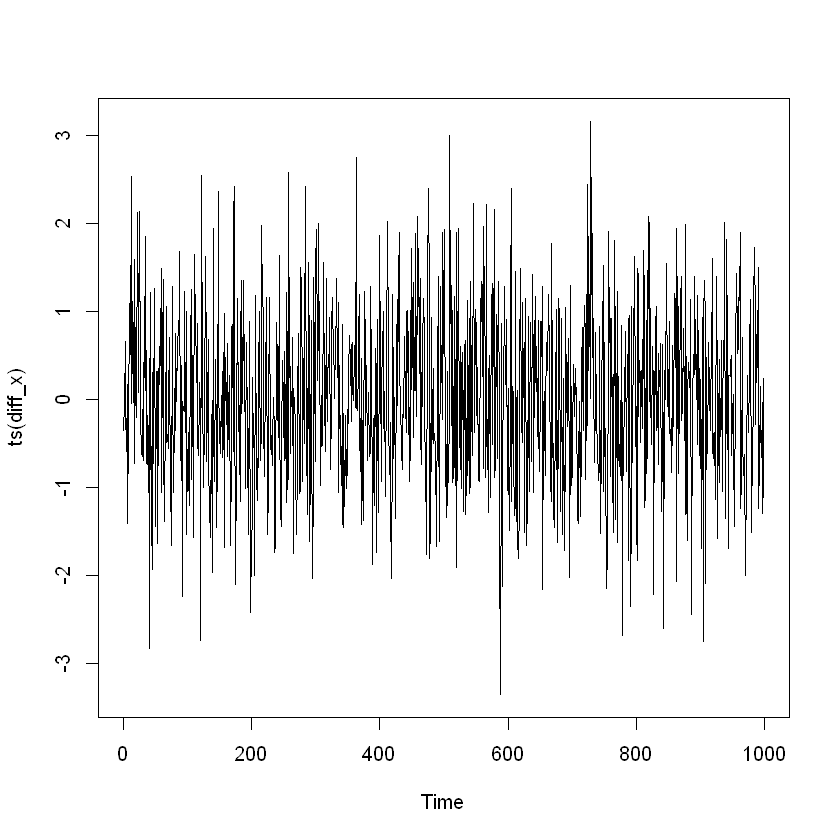

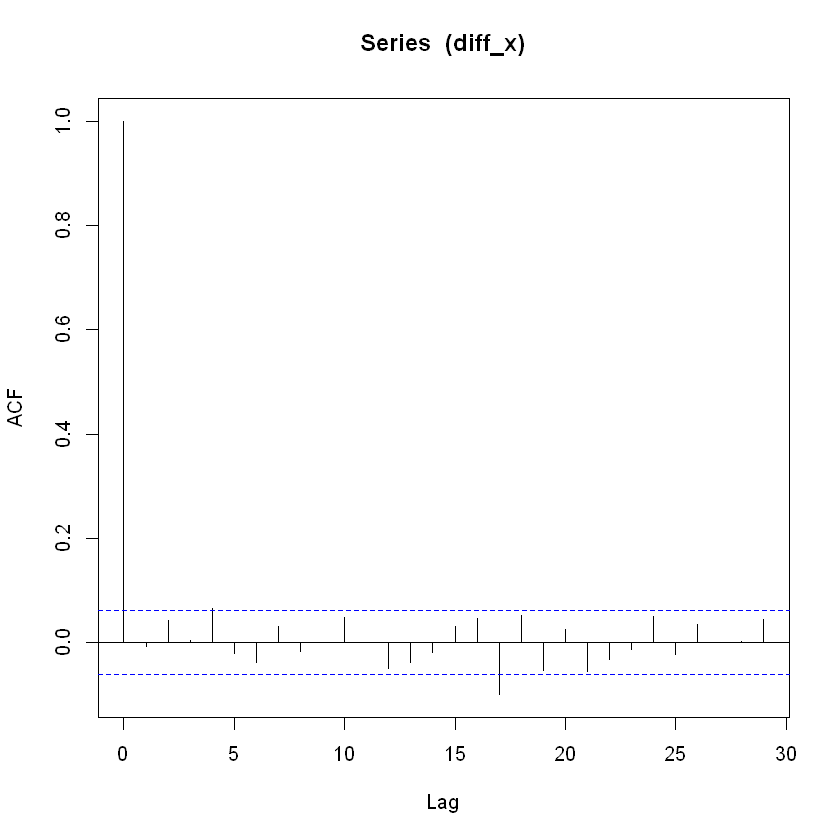

In [23]:
diff_x <- diff(x)
plot(ts(diff_x)) #plot suggests this to be a white noise
acf((diff_x)) #suugests that there is ** no auto-correlation ** . Everything is under control